In [1]:
import glob
from astropy.io import fits


In [2]:
import noise
import numpy as np
import matplotlib.pyplot as plt
# from scipy.misc import toimage

shape = (500,500)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=0)
        
# toimage(world).show()

In [3]:
world.shape

(500, 500)

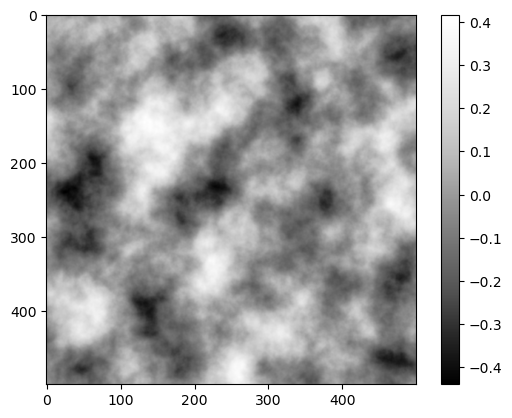

In [4]:
dr=plt.imshow(world, cmap='Greys_r')
plt.colorbar(dr)

In [229]:
shape = (500,500)
scale = 600
octaves = 1
persistence = 5
lacunarity = 2

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=500, 
                                    repeaty=500, 
                                    base=0)

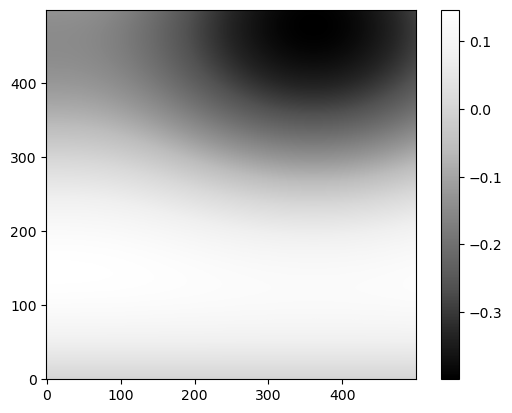

In [230]:
dr=plt.imshow(world, cmap='Greys_r', origin='lower')
plt.colorbar(dr)

In [198]:
list_fits = sorted(glob.glob("fits/lmc/*0, 360*52000.0pc.fits"))

In [199]:
list_fits

['fits/lmc/surface_valueslc2_InfPlane_dt0_loop_ct802_loc[2, 1.3, 1, -195.69359999999998]_dz0.06_w673_angle[0, 360]_sourced52000.0pc.fits',
 'fits/lmc/surface_valueslc2_InfPlane_dt0_loop_ct852_loc[2, 1.3, 1, -195.69359999999998]_dz0.06_w673_angle[0, 360]_sourced52000.0pc.fits']

In [200]:
fits_img = fits.open(list_fits[0])[0].data

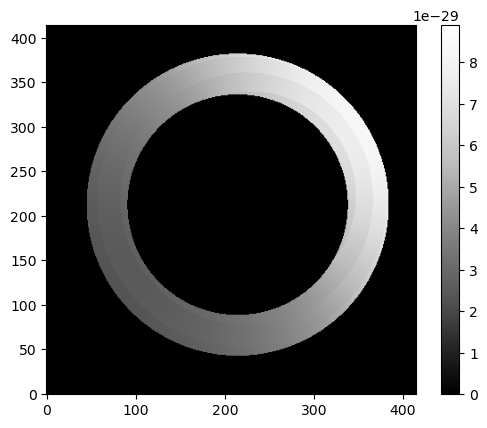

In [234]:
dr=plt.imshow(fits_img, origin='lower', cmap='Greys_r')
plt.colorbar(dr)

In [213]:
shape = (fits_img.shape[0],fits_img.shape[1])
# scale = 500.0
# octaves = 10
# persistence = 0.5
# lacunarity = 2


# shape = (500,500)
scale = 100
octaves = 1
persistence = 0.5
lacunarity = 0.2


world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=0)

In [214]:
world = world*(fits_img!=0)

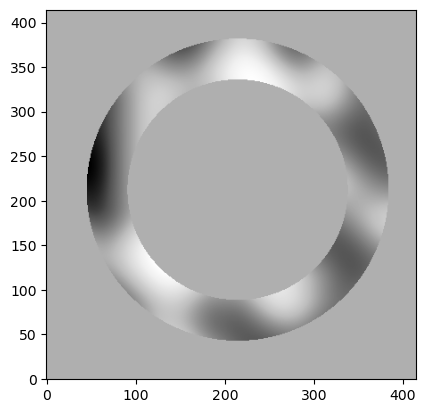

In [215]:
plt.imshow(world, origin='lower', cmap='Greys_r')

In [235]:
dr=plt.imshow(world*fits_img, origin='lower', cmap='Greys_r')
plt.colorbar(dr)

ValueError: operands could not be broadcast together with shapes (500,500) (415,415) 

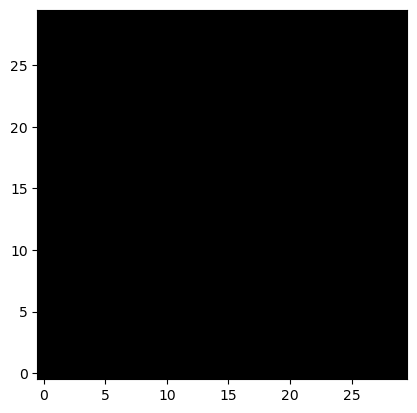

In [233]:
plt.imshow(world[50:80, 50:80]*fits_img[50:80, 50:80], origin='lower', cmap='Greys_r')

In [15]:
# from scipy import signal

In [16]:
# grad = signal.convolve2d(fits_img, world, boundary='symm', mode='same')

In [17]:
# plt.imshow(grad, origin='lower' ,cmap='Greys_r')


In [18]:
from scipy import ndimage as ndi

In [ ]:
filtered = ndi.correlate(fits_img, world)

In [ ]:
plt.imshow(filtered)

In [161]:
shape = (100,100)
scale = 1.0
octaves = 200

persistence = 1
lacunarity = 0.6

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=10, 
                                    repeaty=10, 
                                    base=0)

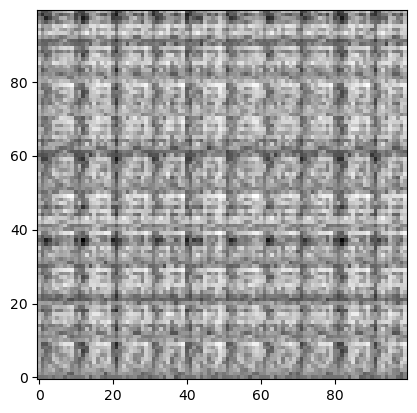

In [162]:
plt.imshow(world, origin='lower', cmap='Greys_r')

In [163]:
filtered = ndi.correlate(fits_img, world)


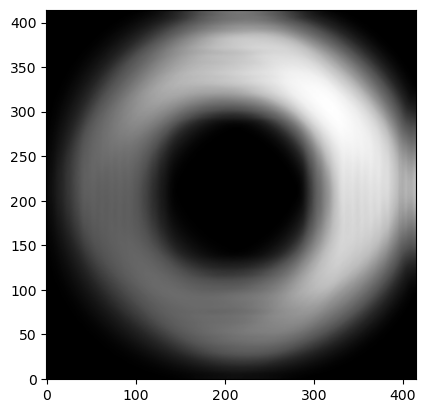

In [164]:
plt.imshow(filtered, origin='lower', cmap='Greys_r')


In [63]:
from numpy.fft import fft2, ifft2

In [71]:
def fft_convolve2d(x,y):
    """ 2D convolution, using FFT"""
    fr = fft2(x)
    fr2 = fft2(np.flipud(np.fliplr(y)))
    m,n = fr.shape
    cc = np.real(ifft2(fr*fr2))
    cc = np.roll(cc, -m/2+1,axis=0)
    cc = np.roll(cc, -n/2+1,axis=1)
    return cc


In [78]:
grad1 = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')


In [80]:
grad1

array([[-3.1143913e-26]])

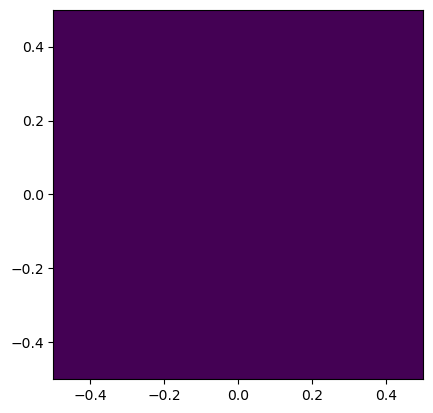

In [79]:
plt.imshow(grad1, origin='lower')
